### 드라이브 연결 & df 불러오기

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ML스터디프로젝트/Boston Housing Price(medv).csv')

In [ ]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,CAT. MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,0
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,1
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,1
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4,0
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6,0
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9,0
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0,0


In [ ]:
import pandas as pd 
import numpy as np
import statsmodels.api as sm

In [ ]:
x_data2 = df[['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD', 'LSTAT', 'B', 'TAX']]
target = df[["MEDV"]]
x_data2.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,LSTAT,B,TAX
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,4.98,396.90,296
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,9.14,396.90,242
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,4.03,392.83,242
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,2.94,394.63,222
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,5.33,396.90,222


In [ ]:
#상수항 추가
x_data2_ = sm.add_constant(x_data2, has_constant='add')
#회귀모델 적합
multi_model2 = sm.OLS(target, x_data2_)
fitted_multi_model2 = multi_model2.fit()

#결과 출력
fitted_multi_model2.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.713
Model:                            OLS   Adj. R-squared:                  0.706
Method:                 Least Squares   F-statistic:                     101.9
Date:                Sun, 30 Apr 2023   Prob (F-statistic):          4.56e-125
Time:                        05:20:54   Log-Likelihood:                -1524.7
No. Observations:                 506   AIC:                             3075.
Df Residuals:                     493   BIC:                             3130.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         14.1689      4.294      3.300      0.001       5.732      22.605
CRIM          -0.1030      0.035     -2.981      0.003      -0.171      -0.035
ZN             0.0775      0.014      5.652      0.000       0.051       0.104
INDUS         -0.0376      0.064     -0.587      0.558      -0.164       0.088
CHAS           3.2744      0.902      3.630      0.000       1.502       5.047
NOX           -8.5977      3.792     -2.267      0.024     -16.048      -1.148
RM             4.2952      0.434      9.901      0.000       3.443       5.148
AGE           -0.0068      0.014     -0.493      0.622      -0.034       0.020
DIS           -1.6115      0.209     -7.718      0.000      -2.022      -1.201
RAD            0.2148      0.069      3.135      0.002       0.080       0.349
LSTAT         -0.5415      0.053    -10.166      0.000      -0.646      -0.437
B              0.0087      0.003      3.067      0.002       0.003       0.014
TAX           -0.0144      0.004     -3.653      0.000      -0.022      -0.007
==============================================================================
Omnibus:                      161.318   Durbin-Watson:                   0.983
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              622.859
Skew:                           1.411   Prob(JB):                    5.59e-136
Kurtosis:                       7.645   Cond. No.                     1.24e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.24e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### ↑OLS를 통해 알 수 있는 사실
- RM & LSTAT : 종속변수와 상관도가 큼
- INDUS, AGE : p-value가 0.05보다 크므로 통계적으로 유이미하지 않음
- Coundition number is large => 다중공선성 有

#다중회귀분석
-가정 : 설명변수는 2개 이상이며, 각 설명변수는 종속변수와 *선형관계*

In [ ]:
fitted_multi_model2.params

const    14.168853
CRIM     -0.102998
ZN        0.077529
INDUS    -0.037621
CHAS      3.274409
NOX      -8.597734
RM        4.295235
AGE      -0.006830
DIS      -1.611544
RAD       0.214769
LSTAT    -0.541531
B         0.008656
TAX      -0.014401
dtype: float64

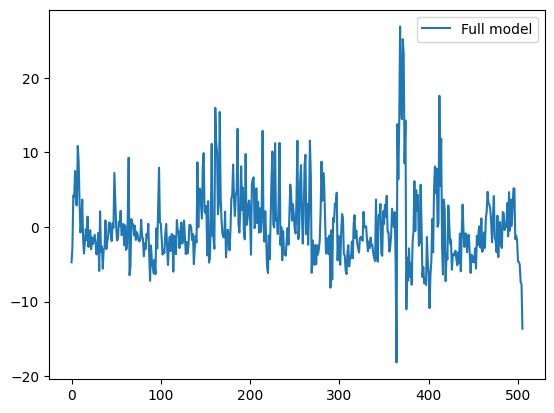

In [ ]:
import matplotlib.pyplot as plt
fitted_multi_model2.resid.plot(label = "Full model")
plt.legend()

In [ ]:
x_data2.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,LSTAT,B,TAX
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.455621,-0.385064,0.582764
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.412995,0.175520,-0.314563
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.603800,-0.356977,0.720760
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.053929,0.048788,-0.035587
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.590879,-0.380051,0.668023
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.613808,0.128069,-0.292048
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.602339,-0.273534,0.506456
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.496996,0.291512,-0.534432
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.488676,-0.444413,0.910228
LSTAT,0.455621,-0.412995,0.603800,-0.053929,0.590879,-0.613808,0.602339,-0.496996,0.488676,1.000000,-0.366087,0.543993


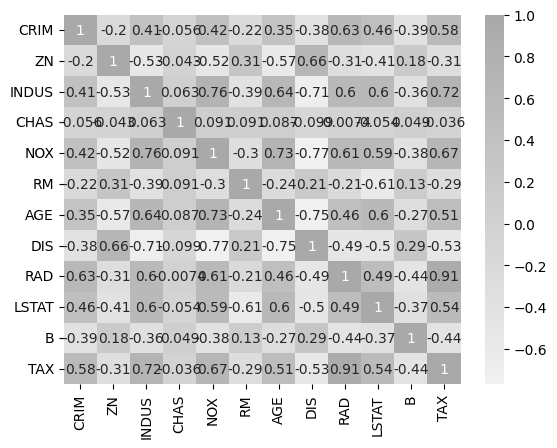

In [ ]:
import seaborn as sns
cmap = sns.light_palette("darkgray",as_cmap=True)
sns.heatmap(x_data2.corr(),annot=True, cmap=cmap)
plt.show()

- 0.5가 넘어가는 변수들간의 상관관계가 빈출되는 것은 충분히 다중공선성의 발생을 의심할 수 있음

### VIF 를 통한 다중공선성 확인
- 10보다 크면 다중공선성 있다고 판단

In [38]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(x_data2.values, i) for i in range(x_data2.shape[1])]
vif["features"] = x_data2.columns
vif

,VIF Factor,features
0,2.099345,CRIM
1,2.451624,ZN
2,14.275283,INDUS
3,1.142167,CHAS
4,73.894171,NOX
5,60.598846,RM
6,21.361234,AGE
7,12.221605,DIS
8,15.159162,RAD
9,10.138324,LSTAT


- 거의 모든 변수가 10을 넘음 그 뜻은 다중공선성 有
=> 정규화 진행



### 정규화

In [39]:
from patsy import dmatrix
df_columns=['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD', 'LSTAT', 'B', 'TAX']
dfX0 = pd.DataFrame(x_data2,columns=df_columns)

formula = "scale(CRIM) + scale(ZN) + scale(INDUS) + scale(CHAS) + scale(NOX) + scale(RM) + scale(AGE) + scale(DIS) + scale(RAD) + scale(LSTAT) + scale(B) + scale(TAX) "
dfX = dmatrix(formula, dfX0, return_type = "dataframe")
dfy = pd.DataFrame(target, columns=["MEDV"])



In [40]:

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(dfX.values, i) for i in range(dfX.shape[1])]
vif["features"] = dfX.columns
vif = vif.sort_values("VIF Factor").reset_index(drop=True)
vif

,VIF Factor,features
0,1.000000,Intercept
1,1.064574,scale(CHAS)
2,1.347004,scale(B)
3,1.791405,scale(CRIM)
4,1.884565,scale(RM)
5,2.076173,scale(ZN)
6,2.935425,scale(LSTAT)
7,3.081867,scale(AGE)
8,3.916373,scale(NOX)
9,3.921277,scale(DIS)


-모든 변수의 VIF가 10이하로 줄어듦듦

In [41]:
#상수항 추가

#회귀모델 적합
multi_model3 = sm.OLS(target, dfX)
fitted_multi_model3 = multi_model3.fit()

#결과 출력
fitted_multi_model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.713
Model:                            OLS   Adj. R-squared:                  0.706
Method:                 Least Squares   F-statistic:                     101.9
Date:                Sun, 30 Apr 2023   Prob (F-statistic):          4.56e-125
Time:                        06:22:16   Log-Likelihood:                -1524.7
No. Observations:                 506   AIC:                             3075.
Df Residuals:                     493   BIC:                             3130.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       22.5328      0.222    101.587      0.000      22.097      22.969
scale(CRIM)     -0.8851      0.297     -2.981      0.003      -1.468      -0.302
scale(ZN)        1.8064      0.320      5.652      0.000       1.178       2.434
scale(INDUS)    -0.2578      0.439     -0.587      0.558      -1.121       0.605
scale(CHAS)      0.8309      0.229      3.630      0.000       0.381       1.281
scale(NOX)      -0.9953      0.439     -2.267      0.024      -1.858      -0.133
scale(RM)        3.0149      0.304      9.901      0.000       2.417       3.613
scale(AGE)      -0.1921      0.389     -0.493      0.622      -0.957       0.573
scale(DIS)      -3.3901      0.439     -7.718      0.000      -4.253      -2.527
scale(RAD)       1.8682      0.596      3.135      0.002       0.697       3.039
scale(LSTAT)    -3.8633      0.380    -10.166      0.000      -4.610      -3.117
scale(B)         0.7894      0.257      3.067      0.002       0.284       1.295
scale(TAX)      -2.4247      0.664     -3.653      0.000      -3.729      -1.120
==============================================================================
Omnibus:                      161.318   Durbin-Watson:                   0.983
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              622.859
Skew:                           1.411   Prob(JB):                    5.59e-136
Kurtosis:                       7.645   Cond. No.                         9.62
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- Cond.No. 이 10 이하로 떨어짐짐

###의존적인 변수 삭제
- 정규화된 것에서 VIF가 높은 RAD, TAX 삭제제

In [42]:
cols=['Intercept', 'scale(CHAS)', 'scale(B)', 'scale(CRIM)', 'scale(RM)',
       'scale(ZN)', 'scale(LSTAT)', 'scale(AGE)', 'scale(NOX)',
       'scale(DIS)', 'scale(INDUS)']

model_boston4 = sm.OLS(np.log(dfy), dfX[cols])
result_boston4 = model_boston4.fit()
result_boston4.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.757
Model:                            OLS   Adj. R-squared:                  0.752
Method:                 Least Squares   F-statistic:                     154.4
Date:                Sun, 30 Apr 2023   Prob (F-statistic):          3.73e-145
Time:                        06:22:19   Log-Likelihood:                 93.347
No. Observations:                 506   AIC:                            -164.7
Df Residuals:                     495   BIC:                            -118.2
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        3.0345      0.009    335.542      0.000       3.017       3.052
scale(CHAS)      0.0368      0.009      3.982      0.000       0.019       0.055
scale(B)         0.0359      0.010      3.464      0.001       0.016       0.056
scale(CRIM)     -0.0841      0.011     -7.770      0.000      -0.105      -0.063
scale(RM)        0.0827      0.012      6.721      0.000       0.058       0.107
scale(ZN)        0.0443      0.013      3.478      0.001       0.019       0.069
scale(LSTAT)    -0.2108      0.015    -13.633      0.000      -0.241      -0.180
scale(AGE)      -0.0054      0.016     -0.340      0.734      -0.037       0.026
scale(NOX)      -0.0504      0.017     -2.892      0.004      -0.085      -0.016
scale(DIS)      -0.1166      0.018     -6.520      0.000      -0.152      -0.081
scale(INDUS)    -0.0338      0.016     -2.166      0.031      -0.064      -0.003
==============================================================================
Omnibus:                       53.670   Durbin-Watson:                   0.994
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              185.460
Skew:                           0.433   Prob(JB):                     5.34e-41
Kurtosis:                       5.836   Cond. No.                         5.12
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

결과 : 다중공선성이 더 낮아짐짐

In [43]:
final_df=dfX.drop(['Intercept','scale(TAX)','scale(RAD),scale(AGE)'],axis=1,inplace=False)
print(final_df)

KeyError: ignored

In [ ]:
target

,MEDV
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2
...,...
501,22.4
502,20.6
503,23.9
504,22.0


### 모델 학습

In [ ]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
X= final_df
y=target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=156)


In [ ]:
# train regression model
from sklearn import linear_model
from sklearn.metrics import mean_squared_error


lr = linear_model.LinearRegression()
model = lr.fit(X_train, y_train)

# print coef
print(lr.coef_) # 학습된 계수를 확인할 수 있음

# data 시각화
# figure size 
plt.rcParams['figure.figsize'] = [12, 16] #rcparams를 이용한 그래프 설정 변환

# graph values
coefs = lr.coef_.tolist() #list로 변환
coefs_series = pd.Series(coefs) #pandas로 변환하기 위해 series로 변환


[[-0.89673575  2.29215254 -0.07020163  0.88018925 -1.18134546  2.60444793
   0.09734303 -3.90227909  2.33442733 -4.27480529  0.88061454 -2.86201255]]


In [ ]:
print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

0.7034755660250103
0.7134196569093223


In [ ]:
y_predictions = lr.predict(X_train)
print(sqrt(mean_squared_error(y_train, y_predictions)))
y_predictions = lr.predict(X_test)
print(sqrt(mean_squared_error(y_test, y_predictions)))

5.154535748848105
4.518629636583297


In [ ]:
import statsmodels.api as sm

X_train = sm.add_constant(X_train)
model = sm.OLS(y_train, X_train).fit()
model.summary() #summary기능을 통해 평가를 간편하게 진행 가능

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.703
Model:                            OLS   Adj. R-squared:                  0.693
Method:                 Least Squares   F-statistic:                     67.42
Date:                Sun, 30 Apr 2023   Prob (F-statistic):           2.21e-82
Time:                        05:21:01   Log-Likelihood:                -1082.8
No. Observations:                 354   AIC:                             2192.
Df Residuals:                     341   BIC:                             2242.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           22.9686      0.280     82.105      0.000      22.418      23.519
scale(CRIM)     -0.8967      0.457     -1.961      0.051      -1.796       0.003
scale(ZN)        2.2922      0.391      5.856      0.000       1.522       3.062
scale(INDUS)    -0.0702      0.581     -0.121      0.904      -1.213       1.072
scale(CHAS)      0.8802      0.303      2.906      0.004       0.284       1.476
scale(NOX)      -1.1813      0.534     -2.212      0.028      -2.232      -0.131
scale(RM)        2.6044      0.367      7.088      0.000       1.882       3.327
scale(AGE)       0.0973      0.474      0.205      0.837      -0.835       1.029
scale(DIS)      -3.9023      0.548     -7.123      0.000      -4.980      -2.825
scale(RAD)       2.3344      0.763      3.060      0.002       0.834       3.835
scale(LSTAT)    -4.2748      0.444     -9.624      0.000      -5.148      -3.401
scale(B)         0.8806      0.336      2.621      0.009       0.220       1.541
scale(TAX)      -2.8620      0.859     -3.333      0.001      -4.551      -1.173
==============================================================================
Omnibus:                       99.876   Durbin-Watson:                   2.017
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              291.324
Skew:                           1.292   Prob(JB):                     5.49e-64
Kurtosis:                       6.615   Cond. No.                         9.88
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### 마무리
- AGE의 p-value가 너무 높게 나온 것으로 보아 중간과정에서 삭제하고 진행하는 것도 성능에 더 도움을 줄 수도..?


In [27]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

In [30]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
X= final_df
y=target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=156)


In [31]:
L_model = LinearRegression()

In [34]:
L_model.fit(X_train, y_train)

LinearRegression()

In [35]:
L_model.score(X_test, y_test)

0.7134196569093223